In [4]:
# importing Required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Reading or loading Data set 
data = pd.read_csv('Dataset.csv')

In [6]:
data.rename({'MEDV':'Prices'}, inplace=True)

In [7]:
#information od dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
Prices     489 non-null int64
dtypes: float64(3), int64(1)
memory usage: 19.1 KB


In [8]:
# shape of data set
print('Boston housing dataset has {} data points with {} variables each'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


Data Exploration

In [9]:
# Min price of the data
minimum_price = np.amin(data.Prices)

# Max price of the data
maximum_price = np.amax(data.Prices)

#Median price of the data
median_price = np.median(data.Prices)

In [10]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Median price ${}".format(median_price))

Statistics for Boston housing dataset:

Minimum price: $105000
Maximum price: $1024800
Median price $438900.0


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


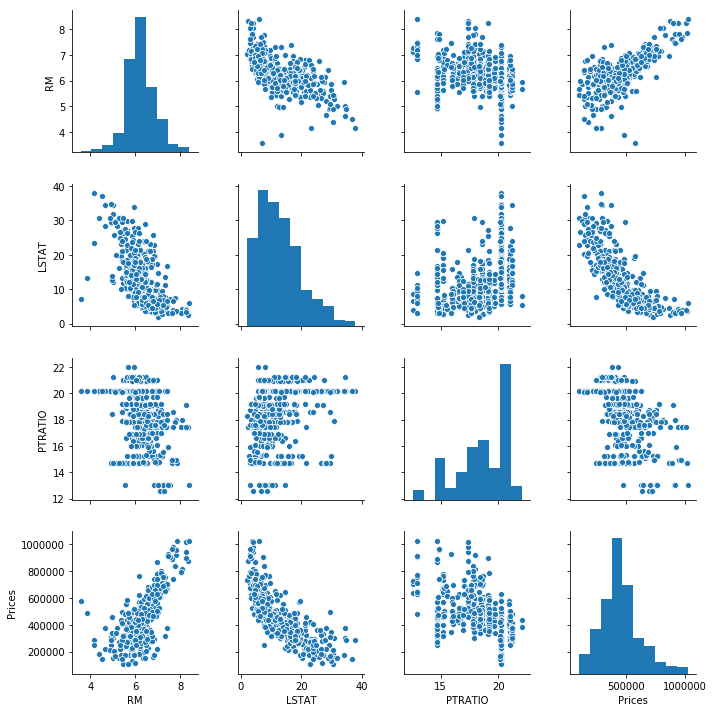

In [11]:
# calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

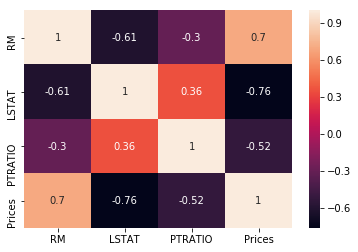

In [12]:
# Calculating correlation Matrix
correlation_matrix = data.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

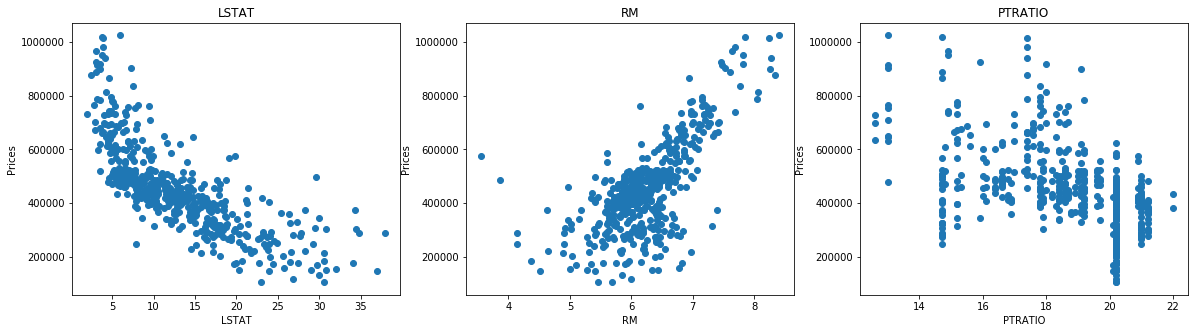

In [13]:
plt.figure(figsize= (20,5))

features = ["LSTAT","RM","PTRATIO"]

target  = data["Prices"]


for i ,col in enumerate (features):
    plt.subplot(1, len(features), i+1)
    x = data [col]
    y = target
    plt.scatter(x,y,marker = "o")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Prices")
    

In [14]:
x = pd.DataFrame(np.c_[data["LSTAT"], data["RM"], data["PTRATIO"] ], columns =["LSTAT","RM","PTRATIO"])
y = data["Prices"]

In [15]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and Split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print ('Training and testing split was successful.')
x_train.shape

Training and testing split was successful.


(391, 3)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Making Predictions

In [17]:
y_pred = lin_model.predict(x_test)


Text(0, 0.5, 'Housing Price')

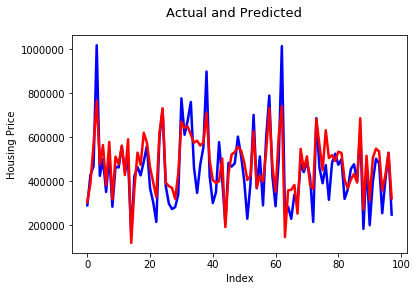

In [18]:
c = [i for i in range(0,98)]
fig = plt.figure()
plt.plot(c,y_test,color = 'blue',linewidth = 2.5, linestyle = '-')
plt.plot(c,y_pred,color = 'red',linewidth = 2.5, linestyle = '-')
fig.suptitle('Actual and Predicted',fontsize=13)
plt.xlabel('Index',fontsize= 10)
plt.ylabel('Housing Price',fontsize= 10)


Text(0, 0.5, 'y_pred')

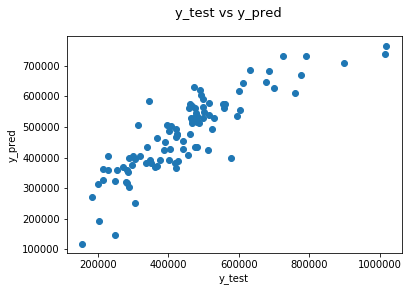

In [19]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred',fontsize=13)
plt.xlabel('y_test', fontsize= 10)
plt.ylabel('y_pred', fontsize= 10)

In [20]:
# Produce a matrix for client data
# Inserting required parameters for prediction (RM: rOOMS PER DWELLING ,LSTAT: Lower status population, PTRATIO: pupil teacher ratio)
                
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(lin_model.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $1,467,954.45
Predicted selling price for Client 2's home: $2,519,478.49
Predicted selling price for Client 3's home: $391,774.14


In [21]:
from sklearn.externals import joblib

In [22]:
joblib.dump(lin_model, 'lin_reg_model.pkl')

['lin_reg_model.pkl']

In [24]:
lin_model = joblib.load('lin_reg_model.pkl')